In [1]:
import pandas as pd
df = pd.read_csv("/content/allsides.csv")


In [2]:
new_df = df[['bias']].copy()


In [3]:
def simplify_bias(bias):
    bias = bias.lower()
    if 'left' in bias and 'center' not in bias:
        return 'left'
    elif 'right' in bias and 'center' not in bias:
        return 'right'
    elif 'center' in bias:
        return 'center'
    else:
        return bias

In [4]:
df['bias_simplified'] = df['bias'].apply(simplify_bias)

In [5]:
print(df[['bias', 'bias_simplified']].head())


          bias bias_simplified
0  left-center          center
1  left-center          center
2     allsides        allsides
3         left            left
4  left-center          center


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df

,name,bias,total_votes,agree,disagree,agree_ratio,agreeance_text,allsides_page,bias_simplified
0,ABC News (Online),left-center,53210,35301,17909,1.971132,Agrees,https://www.allsides.com/news-source/abc-news-...,center
1,Above The Law,left-center,405,266,139,1.913669,Agrees,https://www.allsides.com/news-source/above-law...,center
2,Abridge News,allsides,649,395,254,1.555118,Agrees,https://www.allsides.com/news-source/abridge-n...,allsides
3,AJ+,left,811,607,204,2.975490,Strongly Agrees,https://www.allsides.com/news-source/aj-media-...,left
4,Al Jazeera,left-center,12258,4889,7369,0.663455,Disagrees,https://www.allsides.com/news-source/al-jazeer...,center
...,...,...,...,...,...,...,...,...,...
437,WND.com,right,1154,826,328,2.518293,Strongly Agrees,https://www.allsides.com/news-source/wndcom,right
438,Yahoo News,left-center,6451,3901,2550,1.529804,Agrees,https://www.allsides.com/news-source/yahoo-new...,center
439,Yahoo! The 360,allsides,498,186,312,0.596154,Disagrees,https://www.allsides.com/news-source/yahoo-360...,allsides
440,Yes! Magazine,left,709,463,246,1.882114,Agrees,https://www.allsides.com/news-source/yes-magazine,left


In [7]:
df.drop('bias', axis=1, inplace=True)

In [8]:
df.head(3)

,name,total_votes,agree,disagree,agree_ratio,agreeance_text,allsides_page,bias_simplified
0,ABC News (Online),53210,35301,17909,1.971132,Agrees,https://www.allsides.com/news-source/abc-news-...,center
1,Above The Law,405,266,139,1.913669,Agrees,https://www.allsides.com/news-source/above-law...,center
2,Abridge News,649,395,254,1.555118,Agrees,https://www.allsides.com/news-source/abridge-n...,allsides


In [9]:
df.drop('allsides_page', axis=1, inplace=True)

In [10]:
df.head(3)


,name,total_votes,agree,disagree,agree_ratio,agreeance_text,bias_simplified
0,ABC News (Online),53210,35301,17909,1.971132,Agrees,center
1,Above The Law,405,266,139,1.913669,Agrees,center
2,Abridge News,649,395,254,1.555118,Agrees,allsides


In [11]:
df_num = df[['total_votes','agree','disagree','agree_ratio']].copy()

In [ ]:
df_num.head(3)

,total_votes,agree,disagree,agree_ratio
0,53210,35301,17909,1.971132
1,405,266,139,1.913669
2,649,395,254,1.555118


In [12]:
df_text = df[['name','agreeance_text','bias_simplified']].copy()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)


In [15]:
import numpy as np

In [16]:
df_num = df[['total_votes', 'agree', 'disagree', 'agree_ratio']].copy()
df_num_scaled = scaler.fit_transform(df_num)

In [17]:
df[['total_votes_std', 'agree_std', 'disagree_std', 'agree_ratio_std']] = df_num_scaled


In [18]:
print(df[['total_votes', 'total_votes_std', 'agree', 'agree_std']].head())

   total_votes  total_votes_std  agree  agree_std
0        53210         3.262017  35301   3.859359
1          405        -0.323952    266  -0.329782
2          649        -0.307382    395  -0.314357
3          811        -0.296381    607  -0.289008
4        12258         0.480981   4889   0.222991


In [ ]:
print(df.head())

                name  total_votes  agree  disagree  agree_ratio  \
0  ABC News (Online)        53210  35301     17909     1.971132   
1      Above The Law          405    266       139     1.913669   
2       Abridge News          649    395       254     1.555118   
3                AJ+          811    607       204     2.975490   
4         Al Jazeera        12258   4889      7369     0.663455   

    agreeance_text bias_simplified  total_votes_std  agree_std  disagree_std  \
0           Agrees          center         3.262017   3.859359      2.359104   
1           Agrees          center        -0.323952  -0.329782     -0.301261   
2           Agrees        allsides        -0.307382  -0.314357     -0.284045   
3  Strongly Agrees            left        -0.296381  -0.289008     -0.291530   
4        Disagrees          center         0.480981   0.222991      0.781150   

   agree_ratio_std  
0         0.729368  
1         0.660038  
2         0.227438  
3         1.941148  
4        -0

In [19]:
df.drop(['total_votes', 'agree', 'disagree', 'agree_ratio'], axis=1, inplace=True)

In [ ]:
df.head()

,name,agreeance_text,bias_simplified,total_votes_std,agree_std,disagree_std,agree_ratio_std
0,ABC News (Online),Agrees,center,3.262017,3.859359,2.359104,0.729368
1,Above The Law,Agrees,center,-0.323952,-0.329782,-0.301261,0.660038
2,Abridge News,Agrees,allsides,-0.307382,-0.314357,-0.284045,0.227438
3,AJ+,Strongly Agrees,left,-0.296381,-0.289008,-0.291530,1.941148
4,Al Jazeera,Disagrees,center,0.480981,0.222991,0.781150,-0.848373


In [20]:
import re

In [21]:
print(df.columns)

Index(['name', 'agreeance_text', 'bias_simplified', 'total_votes_std',
       'agree_std', 'disagree_std', 'agree_ratio_std'],
      dtype='object')


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df.head(3)

,name,agreeance_text,bias_simplified,total_votes_std,agree_std,disagree_std,agree_ratio_std
0,ABC News (Online),Agrees,center,3.262017,3.859359,2.359104,0.729368
1,Above The Law,Agrees,center,-0.323952,-0.329782,-0.301261,0.660038
2,Abridge News,Agrees,allsides,-0.307382,-0.314357,-0.284045,0.227438


In [24]:
df['name'] = df['name'].apply(lambda x: re.sub(r'\(.*?\)|\[.*?\]', '', x))
df.head(6)

,name,agreeance_text,bias_simplified,total_votes_std,agree_std,disagree_std,agree_ratio_std
0,ABC News,Agrees,center,3.262017,3.859359,2.359104,0.729368
1,Above The Law,Agrees,center,-0.323952,-0.329782,-0.301261,0.660038
2,Abridge News,Agrees,allsides,-0.307382,-0.314357,-0.284045,0.227438
3,AJ+,Strongly Agrees,left,-0.296381,-0.289008,-0.291530,1.941148
4,Al Jazeera,Disagrees,center,0.480981,0.222991,0.781150,-0.848373
5,AllSides,Strongly Agrees,allsides,0.047513,0.141922,-0.072952,1.404437


In [25]:
df['name'] = df['name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df.head(6)

,name,agreeance_text,bias_simplified,total_votes_std,agree_std,disagree_std,agree_ratio_std
0,ABC News,Agrees,center,3.262017,3.859359,2.359104,0.729368
1,Above The Law,Agrees,center,-0.323952,-0.329782,-0.301261,0.660038
2,Abridge News,Agrees,allsides,-0.307382,-0.314357,-0.284045,0.227438
3,AJ,Strongly Agrees,left,-0.296381,-0.289008,-0.291530,1.941148
4,Al Jazeera,Disagrees,center,0.480981,0.222991,0.781150,-0.848373
5,AllSides,Strongly Agrees,allsides,0.047513,0.141922,-0.072952,1.404437


In [26]:
df['name'] = df['name'].str.strip()

In [27]:
df


,name,agreeance_text,bias_simplified,total_votes_std,agree_std,disagree_std,agree_ratio_std
0,ABC News,Agrees,center,3.262017,3.859359,2.359104,0.729368
1,Above The Law,Agrees,center,-0.323952,-0.329782,-0.301261,0.660038
2,Abridge News,Agrees,allsides,-0.307382,-0.314357,-0.284045,0.227438
3,AJ,Strongly Agrees,left,-0.296381,-0.289008,-0.291530,1.941148
4,Al Jazeera,Disagrees,center,0.480981,0.222991,0.781150,-0.848373
5,AllSides,Strongly Agrees,allsides,0.047513,0.141922,-0.072952,1.404437
6,AllSides Community,Agrees,allsides,-0.070106,-0.046281,-0.096606,0.463769
7,AlterNet,Absolutely Agrees,left,0.775233,1.269230,0.119876,3.925595
8,American Greatness,Strongly Agrees,right,-0.304123,-0.301324,-0.293177,1.501864
9,American Thinker,Agrees,right,-0.147659,-0.127589,-0.165773,0.612805


In [28]:
agreeance_mapping = {
    'absolutely agrees': 10,
    'strongly agrees': 9,
    'somewhat agrees': 7,
    'agrees': 6,
    'neutral': 5,
    'disagrees': 4,
    'somewhat disagrees': 3,
    'strongly disagrees': 2,
    'absolutely disagrees': 0
}

df['agreeance_text_cleaned'] = df['agreeance_text'].str.strip().str.lower()


df['agreeance_score'] = df['agreeance_text_cleaned'].map(agreeance_mapping)

df[['agreeance_text', 'agreeance_score']].head(10)


,agreeance_text,agreeance_score
0,Agrees,6
1,Agrees,6
2,Agrees,6
3,Strongly Agrees,9
4,Disagrees,4
5,Strongly Agrees,9
6,Agrees,6
7,Absolutely Agrees,10
8,Strongly Agrees,9
9,Agrees,6


In [29]:
df[['agreeance_text', 'agreeance_score']]

,agreeance_text,agreeance_score
0,Agrees,6
1,Agrees,6
2,Agrees,6
3,Strongly Agrees,9
4,Disagrees,4
5,Strongly Agrees,9
6,Agrees,6
7,Absolutely Agrees,10
8,Strongly Agrees,9
9,Agrees,6


In [30]:
df.drop('agreeance_text_cleaned', axis=1, inplace=True)


In [31]:
df.head(5)

,name,agreeance_text,bias_simplified,total_votes_std,agree_std,disagree_std,agree_ratio_std,agreeance_score
0,ABC News,Agrees,center,3.262017,3.859359,2.359104,0.729368,6
1,Above The Law,Agrees,center,-0.323952,-0.329782,-0.301261,0.660038,6
2,Abridge News,Agrees,allsides,-0.307382,-0.314357,-0.284045,0.227438,6
3,AJ,Strongly Agrees,left,-0.296381,-0.289008,-0.291530,1.941148,9
4,Al Jazeera,Disagrees,center,0.480981,0.222991,0.781150,-0.848373,4


In [32]:
# Using dataframe df: distribute the data

import altair as alt

# Create a histogram to visualize the distribution of 'agreeance_score'
chart = alt.Chart(df).mark_bar().encode(
    # Bin the 'agreeance_score' data for the histogram
    x=alt.X('agreeance_score', bin=True),
    # Count the occurrences in each bin
    y='count()',
    # Color the bars based on 'bias_simplified' for further distribution analysis
    color='bias_simplified'
).properties(
    # Set the title of the chart
    title='Distribution of Agreeance Score by Bias'
)

# Display the chart
chart

alt.Chart(...)

In [33]:
# skewness of this data

print("Skewness of numerical columns:")
print(df[['total_votes_std', 'agree_std', 'disagree_std', 'agree_ratio_std', 'agreeance_score']].skew())

Skewness of numerical columns:
total_votes_std    5.986333
agree_std          5.529659
disagree_std       6.409430
agree_ratio_std    2.097622
agreeance_score    0.088661
dtype: float64


In [34]:
# Polynomial (fractional) transform to reduce skewness
df['total_votes_std_poly'] = np.power(df['total_votes_std'], 1/2)  # Square root
df['agree_std_poly'] = np.power(df['agree_std'], 1/2)
df['disagree_std_poly'] = np.power(df['disagree_std'], 1/2)
df['agree_ratio_std_poly'] = np.power(df['agree_ratio_std'], 1/2)

# Check skewness after transformation
print("Skewness after polynomial (sqrt) transform:")
print(df[['total_votes_std_poly', 'agree_std_poly', 'disagree_std_poly', 'agree_ratio_std_poly','agreeance_score']].skew())


Skewness after polynomial (sqrt) transform:
total_votes_std_poly    1.028042
agree_std_poly          0.726042
disagree_std_poly       1.209526
agree_ratio_std_poly    0.539542
agreeance_score         0.088661
dtype: float64


In [ ]:
df

,name,agreeance_text,bias_simplified,total_votes_std,agree_std,disagree_std,agree_ratio_std,agreeance_score,total_votes_std_poly,agree_std_poly,disagree_std_poly,agree_ratio_std_poly
0,ABC News,Agrees,center,3.262017,3.859359,2.359104,0.729368,6,1.806106,1.964525,1.535938,0.854030
1,Above The Law,Agrees,center,-0.323952,-0.329782,-0.301261,0.660038,6,NaN,NaN,NaN,0.812427
2,Abridge News,Agrees,allsides,-0.307382,-0.314357,-0.284045,0.227438,6,NaN,NaN,NaN,0.476905
3,AJ,Strongly Agrees,left,-0.296381,-0.289008,-0.291530,1.941148,9,NaN,NaN,NaN,1.393251
4,Al Jazeera,Disagrees,center,0.480981,0.222991,0.781150,-0.848373,4,0.693528,0.472219,0.883827,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
437,WNDcom,Strongly Agrees,right,-0.273088,-0.262823,-0.272966,1.389529,9,NaN,NaN,NaN,1.178783
438,Yahoo News,Agrees,center,0.086629,0.104856,0.059692,0.196896,6,0.294329,0.323814,0.244320,0.443730
439,Yahoo The 360,Disagrees,allsides,-0.317637,-0.339347,-0.275361,-0.929573,4,NaN,NaN,NaN,NaN
440,Yes Magazine,Agrees,left,-0.303308,-0.306227,-0.285242,0.621966,6,NaN,NaN,NaN,0.788648


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

X = df[['total_votes_std_poly', 'agree_std_poly', 'disagree_std_poly', 'agree_ratio_std_poly', 'agreeance_score']]
y = df['bias_simplified']

#  Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Initialize and train the Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#  Predict on test set
y_pred = clf.predict(X_test)

#  Evaluation
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# #  Visualize the decision tree
# plt.figure(figsize=(18, 10))
# plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
# plt.title("Decision Tree Visualization")
# plt.show()


🔍 Accuracy: 0.7303370786516854

📋 Classification Report:
               precision    recall  f1-score   support

    allsides       0.00      0.00      0.00         3
      center       0.85      0.90      0.87        61
        left       0.50      0.46      0.48        13
       right       0.40      0.33      0.36        12

    accuracy                           0.73        89
   macro avg       0.44      0.42      0.43        89
weighted avg       0.71      0.73      0.72        89


🧾 Confusion Matrix:
 [[ 0  3  0  0]
 [ 2 55  1  3]
 [ 0  4  6  3]
 [ 0  3  5  4]]


In [36]:
print(df.columns.tolist())

['name', 'agreeance_text', 'bias_simplified', 'total_votes_std', 'agree_std', 'disagree_std', 'agree_ratio_std', 'agreeance_score', 'total_votes_std_poly', 'agree_std_poly', 'disagree_std_poly', 'agree_ratio_std_poly']


In [37]:
from sklearn.metrics import r2_score

# Convert classes to numbers if not already encoded
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate R-squared
r2 = r2_score(y_test_encoded, y_pred_encoded)
print("R-squared:", r2)


R-squared: 0.1766519823788546


🔍 Accuracy: 0.7303370786516854
🎯 Precision (Weighted): 0.706914433880726
📈 Recall (Weighted): 0.7303370786516854
📊 F1 Score (Weighted): 0.7175011754787036

📋 Full Classification Report:
               precision    recall  f1-score   support

    allsides       0.00      0.00      0.00         3
      center       0.85      0.90      0.87        61
        left       0.50      0.46      0.48        13
       right       0.40      0.33      0.36        12

    accuracy                           0.73        89
   macro avg       0.44      0.42      0.43        89
weighted avg       0.71      0.73      0.72        89


🧾 Confusion Matrix:
 [[ 0  3  0  0]
 [ 2 55  1  3]
 [ 0  4  6  3]
 [ 0  3  5  4]]


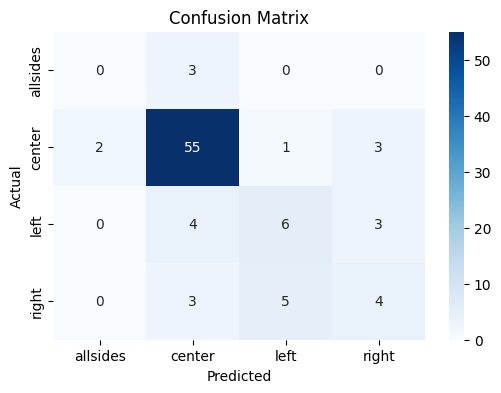

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("🎯 Precision (Weighted):", precision_score(y_test, y_pred, average='weighted'))
print("📈 Recall (Weighted):", recall_score(y_test, y_pred, average='weighted'))
print("📊 F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))
print("\n📋 Full Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🧾 Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [39]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate error
error_decimal = 1 - accuracy
error_percentage = error_decimal * 100

print(" Accuracy:", round(accuracy, 4))
print(" Error (decimal):", round(error_decimal, 4))
print(" Error (percentage):", round(error_percentage, 2), "%")


 Accuracy: 0.7303
 Error (decimal): 0.2697
 Error (percentage): 26.97 %


In [40]:
import pandas as pd

# Create artificial test data
artificial_data = pd.DataFrame({
    'total_votes_std_poly': [0.5, -1.2, 2.0],
    'agree_std_poly': [0.3, -0.8, 1.7],
    'disagree_std_poly': [-0.6, 1.0, 0.9],
    'agree_ratio_std_poly': [0.2, 0.5, -1.1],
    'agreeance_score': [0.8, -0.5, 1.2]
})

print(" Artificial Test Samples:")
print(artificial_data)


 Artificial Test Samples:
   total_votes_std_poly  agree_std_poly  disagree_std_poly  \
0                   0.5             0.3               -0.6   
1                  -1.2            -0.8                1.0   
2                   2.0             1.7                0.9   

   agree_ratio_std_poly  agreeance_score  
0                   0.2              0.8  
1                   0.5             -0.5  
2                  -1.1              1.2  


In [41]:
predictions = clf.predict(artificial_data)
print(" Predicted Bias Labels:", predictions)


 Predicted Bias Labels: ['center' 'center' 'center']


In [42]:
# Artificial test data
artificial_data = pd.DataFrame({
    'total_votes_std_poly': [0.5, -1.2, 2.0],
    'agree_std_poly': [0.3, -0.8, 1.7],
    'disagree_std_poly': [-0.6, 1.0, 0.9],
    'agree_ratio_std_poly': [0.2, 0.5, -1.1],
    'agreeance_score': [0.8, -0.5, 1.2]
})

# Fake ground-truth labels for testing accuracy (manually assigned)
y_true = ['center', 'right', 'left']  # Example only

# Predict using trained model
y_pred = clf.predict(artificial_data)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(" Accuracy:", accuracy_score(y_true, y_pred))

print(" Classification Report:\n", classification_report(y_true, y_pred))

print(" Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


 Accuracy: 0.3333333333333333
 Classification Report:
               precision    recall  f1-score   support

      center       0.33      1.00      0.50         1
        left       0.00      0.00      0.00         1
       right       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

 Confusion Matrix:
 [[1 0 0]
 [1 0 0]
 [1 0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
# Predict
y_pred = clf.predict(artificial_data)
print("🔮 Predicted Labels:", y_pred)

# Predict probabilities (confidence)
y_proba = clf.predict_proba(artificial_data)

# Show with class names
proba_df = pd.DataFrame(y_proba, columns=clf.classes_)
print("\n📊 Prediction Probabilities:")
print(proba_df)


🔮 Predicted Labels: ['center' 'center' 'center']

📊 Prediction Probabilities:
   allsides  center  left  right
0       0.0     1.0   0.0    0.0
1       0.0     1.0   0.0    0.0
2       0.0     1.0   0.0    0.0


In [44]:
#deployment
import joblib
joblib.dump(clf, "bias_decision_tree_model.pkl")


['bias_decision_tree_model.pkl']

In [46]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [47]:
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load("bias_decision_tree_model.pkl")

st.title("🧠 Bias Prediction using Decision Tree")
st.write("Enter numeric features to predict political bias:")

# Input fields
total_votes = st.number_input("Total Votes (standardized)", value=0.0)
agree = st.number_input("Agree (standardized)", value=0.0)
disagree = st.number_input("Disagree (standardized)", value=0.0)
agree_ratio = st.number_input("Agree Ratio (standardized)", value=0.0)
agreeance_score = st.slider("Agreeance Score (0 to 10)", 0, 10, 5)

# Predict
if st.button("Predict Bias"):
    input_data = np.array([[total_votes, agree, disagree, agree_ratio, agreeance_score]])
    prediction = model.predict(input_data)[0]
    st.success(f"Predicted Bias: **{prediction}**")


2025-07-09 04:13:45.058 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 04:13:45.135 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-09 04:13:45.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 04:13:45.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 04:13:45.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 04:13:45.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 04:13:45.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 04:13:45.140 Thread 'MainThread': mi

In [48]:
import joblib

# Save the trained model
joblib.dump(clf, "bias_decision_tree_model.pkl")


['bias_decision_tree_model.pkl']

In [49]:
from google.colab import files
files.download("bias_decision_tree_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>